In [0]:
!pip install wordcloud

In [0]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

events = pd.read_csv("events_ORLANDO FOA.csv")
events.iloc[:6]

,title,description,duration,labels,category,venue_name,scope,rank,local_rank,aviation_rank,longitude,latitude,date,dist
0,2017 Florida Black Student Union Conference,"""On APRIL 1 - APRIL 2, 2017 the Florida BSU Co...",115200,"""community,conference""",conferences,NaN,locality,43,60.0,0.0,-81.203304,28.596877,2017-04-02,27.862381
1,Pity The Fools by The Humor Mill Orlando,"""The Humor Mill Orlando, Central Florida's Pre...",5400,"""performing-arts""",performing-arts,Orlando Shakespeare Theater,locality,30,55.0,NaN,-81.366891,28.573423,2017-04-02,13.846776
2,"Guest Artist: Allen and Laura Vizzutti, trumpe...","""Campus Location: Rehearsal Hall, Auditorium(1...",0,"""campus,concert,music""",concerts,University of Central Florida,locality,21,38.0,NaN,-81.200060,28.602427,2017-04-02,28.443897
3,World Autism Awareness Day,"""World Autism Awareness Day raises an awarenes...",86399,"""holiday,observance,observance-united-nations""",observances,World Autism Awareness Day,country,50,NaN,0.0,-95.712891,37.090240,2017-04-02,1638.677866
4,A Tribute to Marvin Hamlisch,"""Location: Off Campus in the Off CampusCost: V...",0,"""campus,concert,music""",concerts,University of Central Florida,locality,22,39.0,NaN,-81.200060,28.602427,2017-04-02,28.443897
5,WWE NXT TakeOver,NaN,0,"""fighting,sport,wrestling,wwe""",sports,Amway Center,locality,76,94.0,49.0,-81.383860,28.539256,2017-04-02,9.855944


In [0]:
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import branca

class events_summary(object):
    def __init__(self, data):
        self.data = data
        self.rank_dict = {'minor': [0, 20], 'moderate': [21, 40], 'important': [41, 60], \
                          'significant': [61, 80], 'major': [81, 100]}
    
    def filter_events(self, rank_filter, dist_filter, column_filter):
        """
        @param rank_filter: a list for rank filter, where values can be integers or strings.
        @param dist_filter: a list for distance filter
        @param column_filter: a list for column filter
        """
        if rank_filter:
            if type(rank_filter) is list:
                if type(rank_filter[0]) is str:
                    rank_list = [rank_dict[i] for i in rank_filter]
                    rank_list = sum(rank_list, [])
                    filtered_data = self.data[self.data['rank'].between(min(rank_list), 
                                                                    max(rank_list), 
                                                                    inclusive=True)]
                
                if type(rank_filter[0]) is int:
                    filtered_data = self.data[self.data['rank'].between(rank_filter[0], 
                                                                    rank_filter[1], 
                                                                    inclusive=True)]
            else:
                filtered_data = self.data[filtered_data['rank'].between(rank_dict[rank_filter][0],
                                                                rank_dict[rank_filter][1],
                                                                inclusive=True)]
                                              
        if dist_filter:
            filtered_data = filtered_data[filtered_data['dist'].between(dist_filter[0], 
                                                            dist_filter[1], 
                                                            inclusive=True)]
        if column_filter:
            filtered_data = filtered_data[column_filter]
        
        return filtered_data

    def top_venues(self, rank_filter, dist_filter, n=10):
        """
        @param rank_filter: a list for rank filter, where values can be integers or strings.
        @param dist_filter: a list for distance filter
        @param n: the number of top venues
        """
        filtered_venues = self.filter_events(rank_filter, dist_filter, ['venue_name']).dropna()['venue_name'].unique()[-n:]

        for venue in filtered_venues:
            os.mkdir(venue)
            f= open(venue + "/README.txt","w+")
            f.write("Venue name: " + venue)
            f.write('/n')
            mask = self.data.venue_name == venue
            certain_events = self.data[mask]
            rank = []
            # events in current venue
            print("Events Happens in " + venue + ":")
            print(pd.DataFrame(certain_events))
            certain_events.to_csv(venue + "/" + venue + "_events.csv")

            # venue distance
            dist = certain_events.iloc[0].dist
            f.write("Distance from the store in km: " + str(dist))
            f.write('/n')
            print("Distance from the store in km: " + str(dist))

            # title + description wordcloud
            tit = ' '.join(certain_events.title) + ' '.join(certain_events.description.fillna(' '))
            if tit:
                wc = WordCloud(width=800, height=500, max_font_size=80, max_words=500, background_color="white").generate(tit)
                wc.to_file(venue + "/events_wordcloud.png")
            plt.figure(dpi=150)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis("off")
            plt.title("Events happens in " + venue)
            plt.show()
            
            # freq_events
            freq_events = []
            events_names = certain_events.title.unique()
            for title in events_names:
                tmp_mask = certain_events.title == title
                s = sum(tmp_mask)
                if (s >= 2) & (s <= 4):
                  freq_events.append(title)
                  rank.append(certain_events[tmp_mask]['rank'][:1].values)
            print("Frequent Events: ")
            print(freq_events)
            pd.DataFrame(freq_events).to_csv(venue + "/" + venue + "_freq_events.csv")
            if rank: 
                print("rank range: (min: " + str(min(rank)) + ', max: ' + str(max(rank)) + ')')   
                f.write("rank range: (min: " + str(min(rank)) + ', max: ' + str(max(rank)) + ')')
                f.write('/n')
                # venue capacity, capacity = 9644.2*ln(rank) - 19769
                print("Venue estimated capacity: " + str(9644.2 * np.log(max(rank)) - 19769))
                f.write("Venue estimated capacity: " + str(9644.2 * np.log(max(rank)) - 19769))
                f.write('/n')
            else:
                print("Venue estimated capacity: " + str(9644.2 * np.log(certain_events.iloc[0]['rank']) - 19769))
                f.write("Venue estimated capacity: " + str(9644.2 * np.log(certain_events.iloc[0]['rank']) - 19769))
                f.write('/n')
                    
            # label WordCloud
            txt = ''
            for t in certain_events.labels:
              txt += ','.join(t.strip("\"").split(',')) + ','
            
            wc = WordCloud(width=800, height=500, max_font_size=80, max_words=500, background_color="white").generate(txt)
            wc.to_file(venue + "/labels_wordcloud.png")

            plt.figure(dpi=150)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis("off")
            plt.title("Labels WordCloud: ")
            plt.show()

            f.close()
            

Events Happens in Orlando International Guitar And Music Expo:
                                             title  ...      dist
19766  Orlando International Guitar And Music Expo  ...  9.209933
19767  Orlando International Guitar And Music Expo  ...  9.209933
19768  Orlando International Guitar And Music Expo  ...  9.209933

[3 rows x 14 columns]
Distance from the store in km: 9.209932669070987


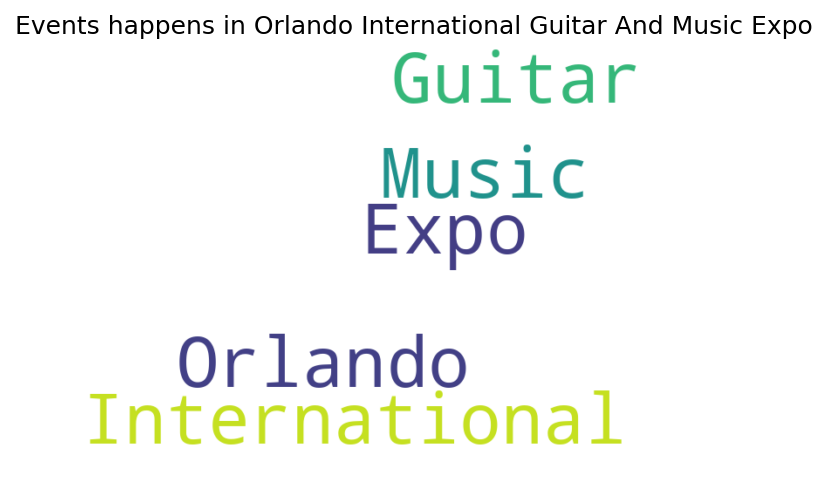

Frequent Events: 
['Orlando International Guitar And Music Expo']
rank range: (min: [64], max: [64])
Venue estimated capacity: [20340.10023254]


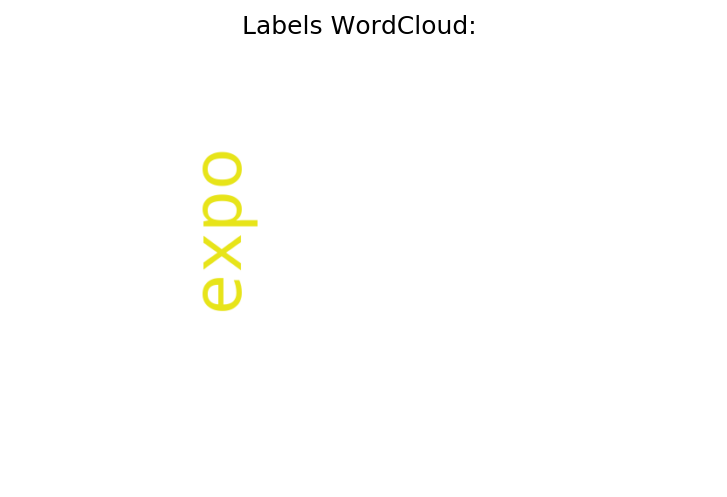

Events Happens in International Palms Resort & Conference Center Orlando:
                                                   title  ...      dist
19705                   TheXpos Wedding/Quinceanera Show  ...  2.478899
20492  Human Resources for Anyone with Newly Assigned...  ...  2.478899
20590                             Our Dream Wedding Expo  ...  2.478899
20764                      Dealing with Difficult People  ...  2.478899
22338  HOME BASS with Justin Martin and Dr. Fresch an...  ...  2.478899
22905                      Dealing with Difficult People  ...  2.478899

[6 rows x 14 columns]
Distance from the store in km: 2.4788994349413245


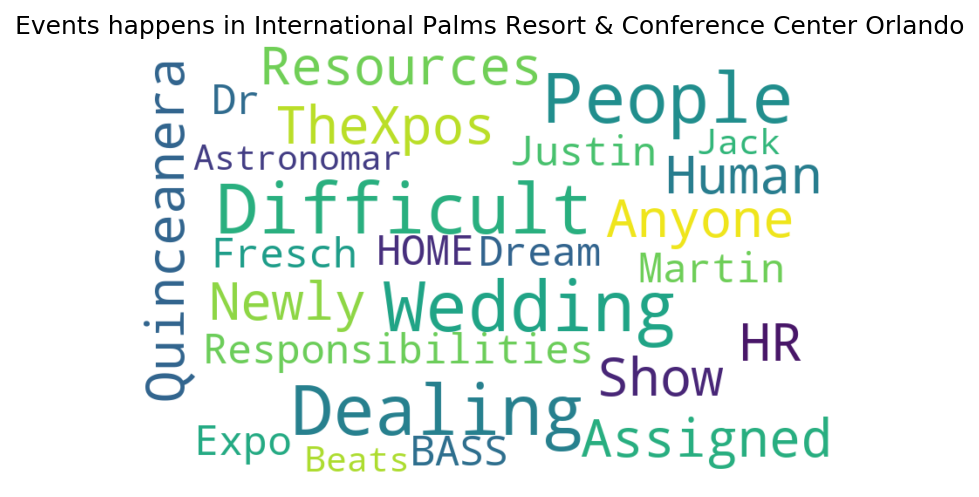

Frequent Events: 
['Dealing with Difficult People']
rank range: (min: [50], max: [50])
Venue estimated capacity: [17959.33226895]


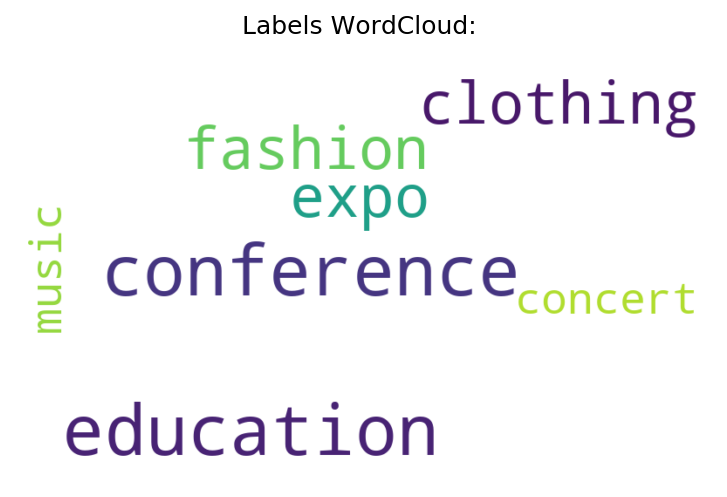

Events Happens in Loews Royal Pacific Resort at Universal Orlando:
                               title  ...     dist
1431   Common Meeting and Exposition  ...  1.61871
1432   Common Meeting and Exposition  ...  1.61871
1433   Common Meeting and Exposition  ...  1.61871
1434   Common Meeting and Exposition  ...  1.61871
2665                      Wine Quest  ...  1.61871
...                              ...  ...      ...
23607             Dam Safety Orlando  ...  1.61871
23608             Dam Safety Orlando  ...  1.61871
23609             Dam Safety Orlando  ...  1.61871
23610             Dam Safety Orlando  ...  1.61871
23611             Dam Safety Orlando  ...  1.61871

[95 rows x 14 columns]
Distance from the store in km: 1.6187098432245544


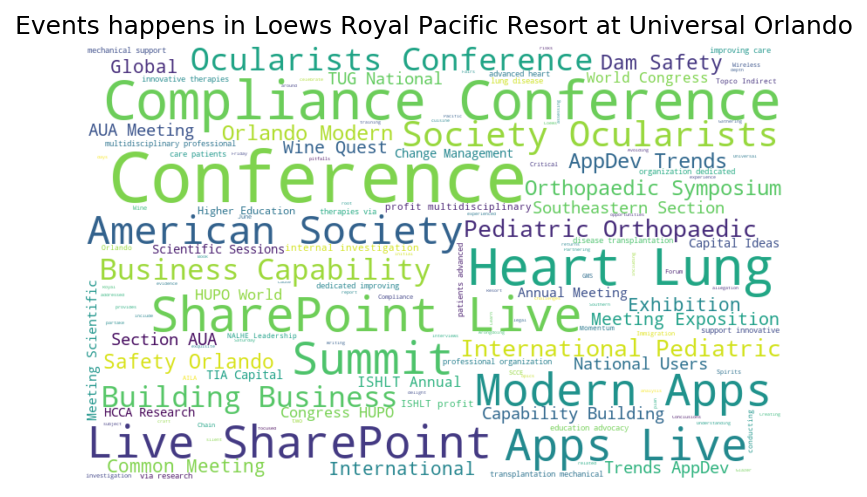

Frequent Events: 
['Common Meeting and Exposition', 'Wine Quest', 'The Topco Indirect Summit', 'Critical Chain Conference', 'Southeastern Section of the AUA Meeting', 'TUG National Users Conference', 'Wireless Global Congress', 'HUPO World Congress', 'NALHE Leadership Summit', 'ISHLT Annual Meeting and Scientific Sessions', 'TIA Capital Ideas Conference Exhibition', 'Change Management', 'HCCA Research Compliance Conference', 'Higher Education Compliance Conference', 'AILA GMS Global Immigration Forum', 'Momentum']
rank range: (min: [27], max: [64])
Venue estimated capacity: [20340.10023254]


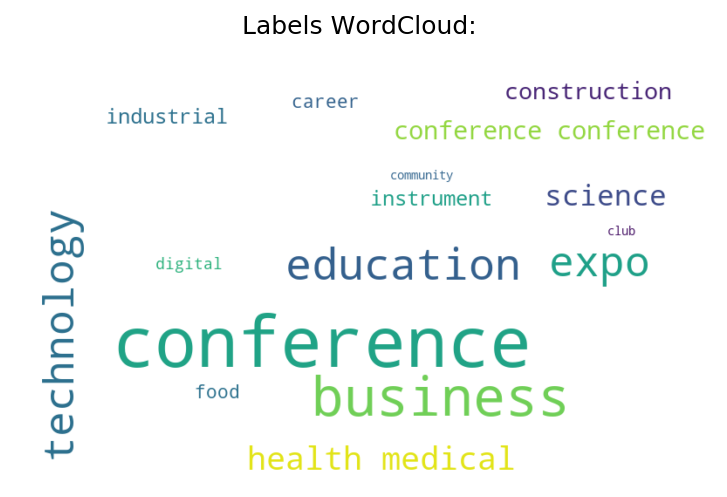

Events Happens in Repticon Orlando Show:
                       title description  ...        date      dist
20924  Repticon Orlando Show         NaN  ...  2019-04-06  9.209933
20925  Repticon Orlando Show         NaN  ...  2019-04-07  9.209933

[2 rows x 14 columns]
Distance from the store in km: 9.209932669070987


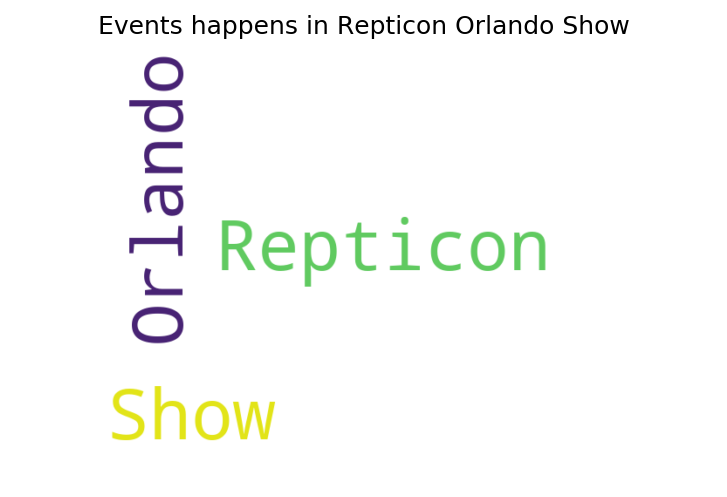

Frequent Events: 
['Repticon Orlando Show']
rank range: (min: [64], max: [64])
Venue estimated capacity: [20340.10023254]


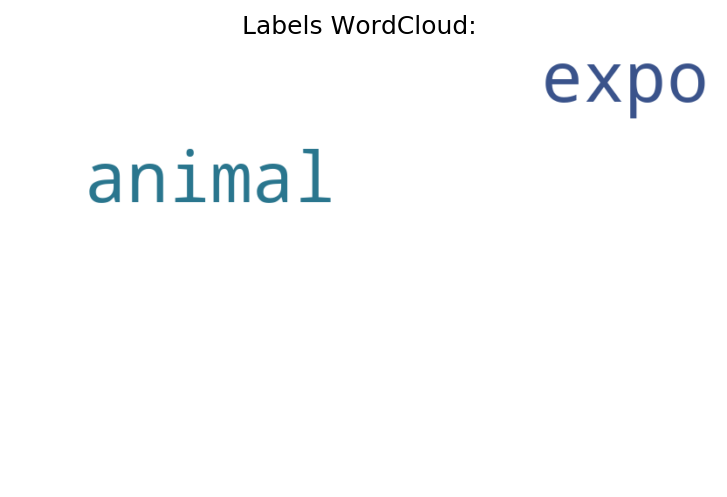

Events Happens in Repticon Orlando Reptile & Exotic Animal Show:
                                               title  ...      dist
20929  Repticon Orlando Reptile & Exotic Animal Show  ...  9.209933
20930  Repticon Orlando Reptile & Exotic Animal Show  ...  9.209933

[2 rows x 14 columns]
Distance from the store in km: 9.209932669070987


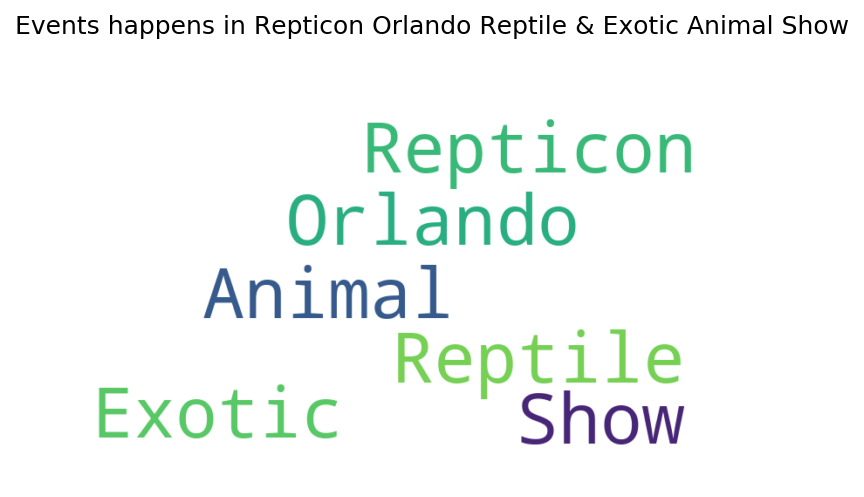

Frequent Events: 
['Repticon Orlando Reptile & Exotic Animal Show']
rank range: (min: [64], max: [64])
Venue estimated capacity: [20340.10023254]


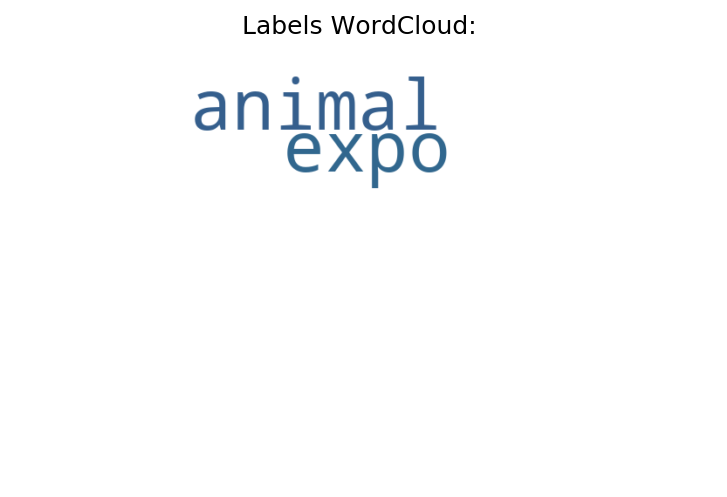

Events Happens in Loews Sapphire Falls Resort at Universal Orlando:
                               title  ...      dist
12698      How to Sessions at Praxis  ...  1.995289
12885           WFG Spark Event 2018  ...  1.995289
12886           WFG Spark Event 2018  ...  1.995289
12887           WFG Spark Event 2018  ...  1.995289
22970  FSASC Conference & Trade Show  ...  1.995289
22971  FSASC Conference & Trade Show  ...  1.995289
22972  FSASC Conference & Trade Show  ...  1.995289

[7 rows x 14 columns]
Distance from the store in km: 1.9952886181492415


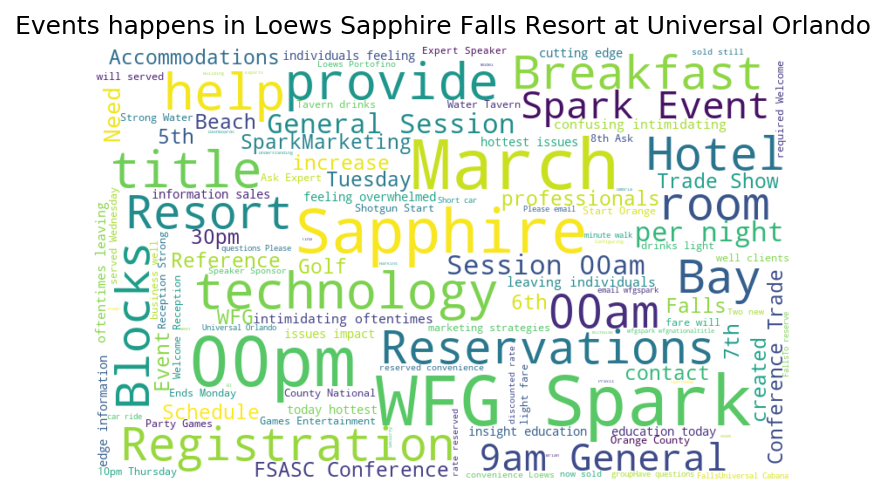

Frequent Events: 
['WFG Spark Event 2018', 'FSASC Conference & Trade Show']
rank range: (min: [46], max: [64])
Venue estimated capacity: [20340.10023254]


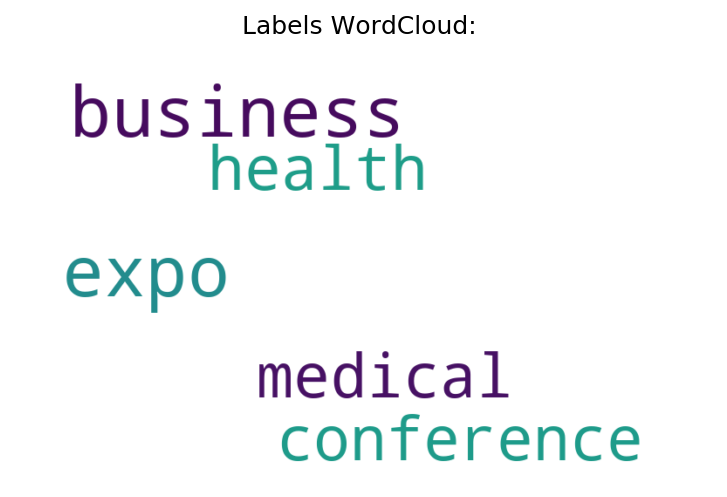

Events Happens in Wyndham Orlando Resort:
                              title  ...      dist
30     WrestleCon Bus Ride to Mania  ...  3.180181
23269         Gay Days Orlando Expo  ...  3.180181
23270         Gay Days Orlando Expo  ...  3.180181
23271         Gay Days Orlando Expo  ...  3.180181
23272         Gay Days Orlando Expo  ...  3.180181
23273         Gay Days Orlando Expo  ...  3.180181

[6 rows x 14 columns]
Distance from the store in km: 3.180181309762528


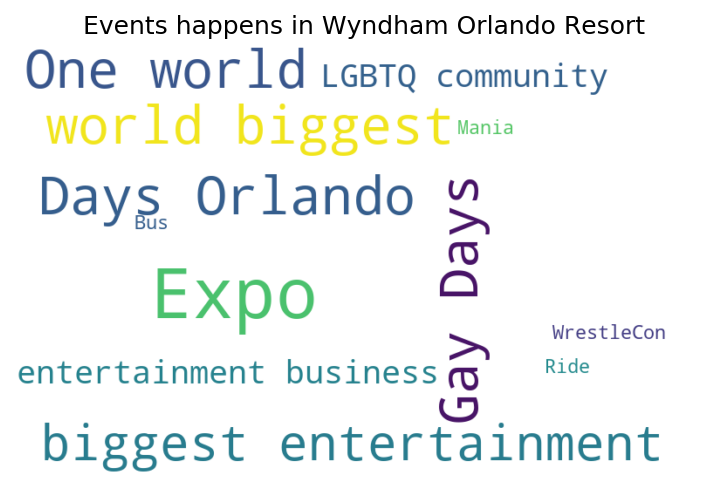

Frequent Events: 
[]
Venue estimated capacity: 16045.431725709692


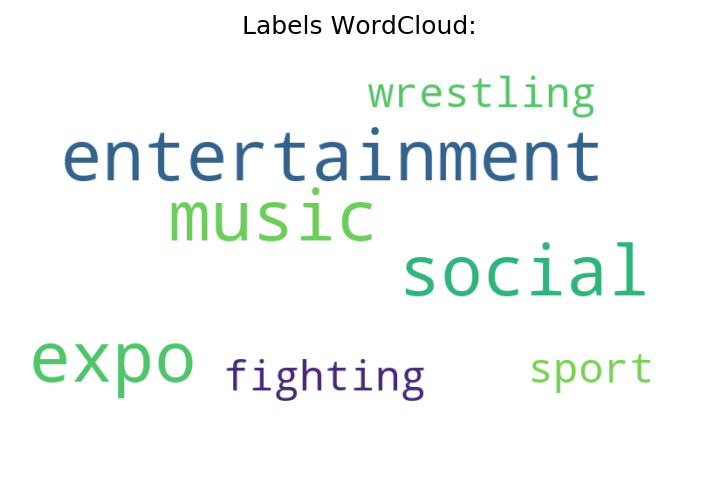

Events Happens in Florida Hardware Dealer Market:
                                title description  ...        date      dist
23289  Florida Hardware Dealer Market         NaN  ...  2019-08-17  0.807931
23290  Florida Hardware Dealer Market         NaN  ...  2019-08-18  0.807931

[2 rows x 14 columns]
Distance from the store in km: 0.8079314073235587


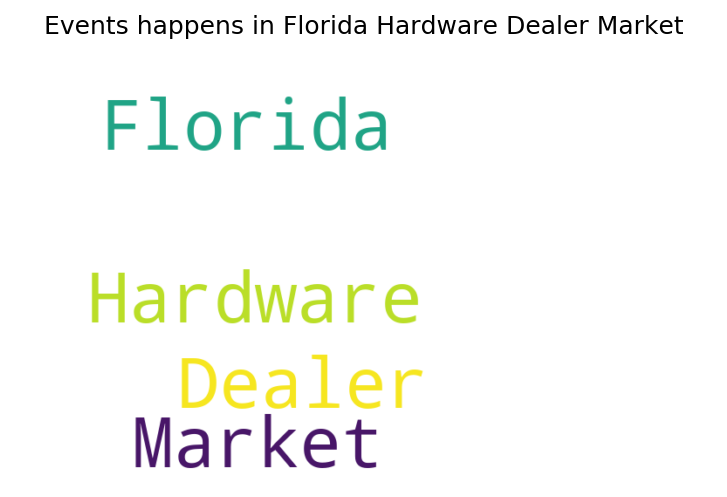

Frequent Events: 
['Florida Hardware Dealer Market']
rank range: (min: [76], max: [76])
Venue estimated capacity: [21997.45848039]


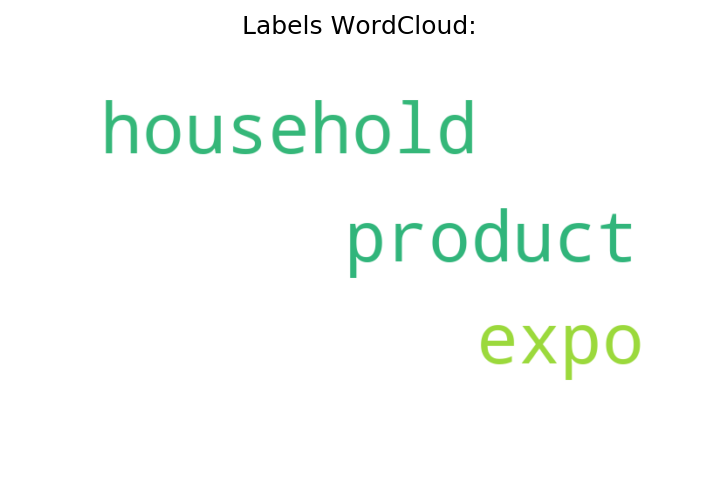

Events Happens in Universal Orlando:
                         title  ...      dist
23557  Halloween Horror Nights  ...  2.015954
23558  Halloween Horror Nights  ...  2.015954
23559  Halloween Horror Nights  ...  2.015954
23560  Halloween Horror Nights  ...  2.015954
23561  Halloween Horror Nights  ...  2.015954
23562  Halloween Horror Nights  ...  2.015954
23563  Halloween Horror Nights  ...  2.015954
23564  Halloween Horror Nights  ...  2.015954
23565  Halloween Horror Nights  ...  2.015954
23566  Halloween Horror Nights  ...  2.015954
23567  Halloween Horror Nights  ...  2.015954
23568  Halloween Horror Nights  ...  2.015954
23569  Halloween Horror Nights  ...  2.015954
23570  Halloween Horror Nights  ...  2.015954
23571  Halloween Horror Nights  ...  2.015954
23572  Halloween Horror Nights  ...  2.015954
23573  Halloween Horror Nights  ...  2.015954
23574  Halloween Horror Nights  ...  2.015954
23575  Halloween Horror Nights  ...  2.015954
23576  Halloween Horror Nights  ...  2.0159

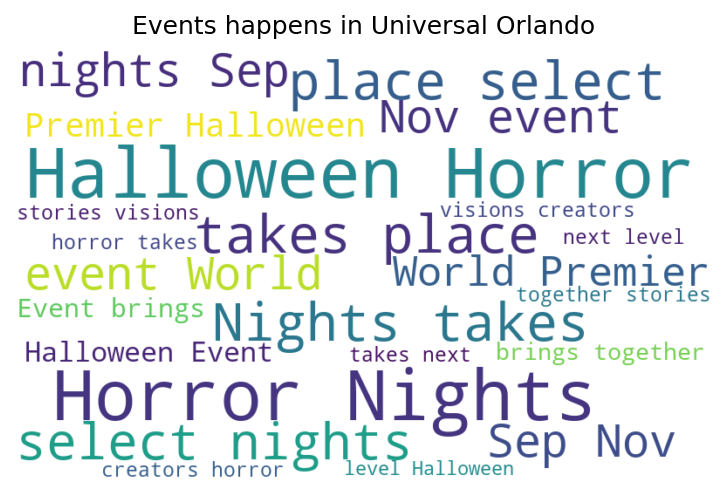

Frequent Events: 
[]
Venue estimated capacity: 24644.18230770636


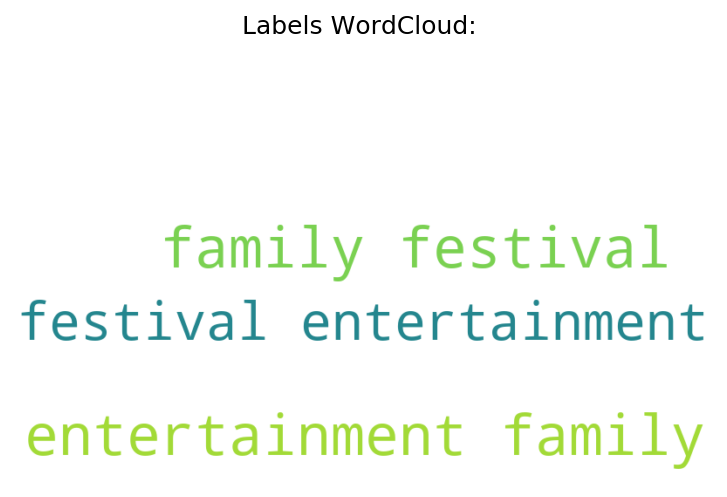

Events Happens in The Point Orlando Resort:
                                                   title  ...      dist
16937                           Managing Human Resources  ...  2.188049
16938                           Managing Human Resources  ...  2.188049
22039  Leadership, Team-Building and Coaching Skills ...  ...  2.188049
23462  Managing Multiple Priorities, Projects and Dea...  ...  2.188049
23750  Leadership, Team-Building and Coaching Skills ...  ...  2.188049

[5 rows x 14 columns]
Distance from the store in km: 2.188049412762393


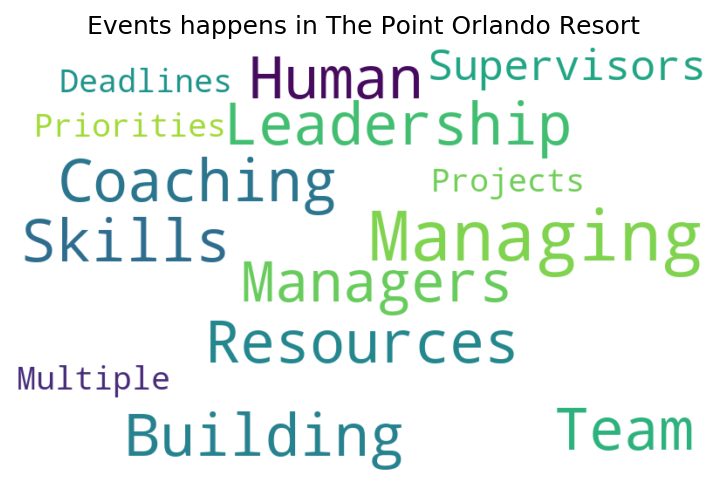

Frequent Events: 
['Managing Human Resources', 'Leadership, Team-Building and Coaching Skills for Managers and Supervisors']
rank range: (min: [44], max: [50])
Venue estimated capacity: [17959.33226895]


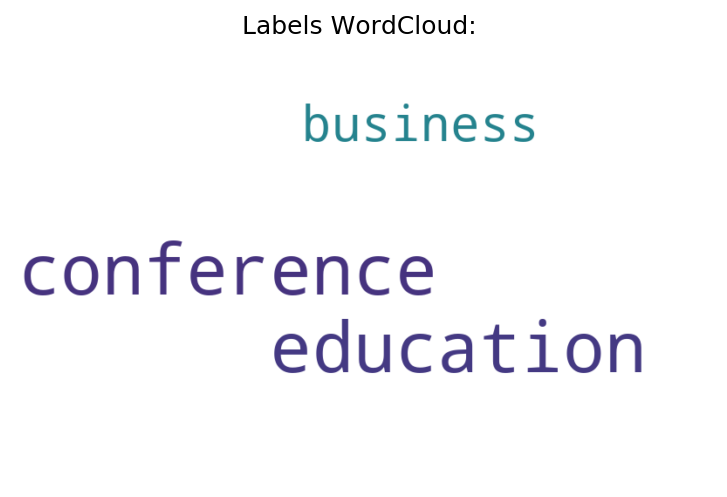

In [0]:
events_summary = events_summary(events)
events_summary.top_venues([60, 100], [0, 10])